In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import spacy
from collections import Counter
from string import punctuation
from matplotlib import rcParams
%matplotlib inline
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
messages = pd.read_json('amelia.json')
messages

,Title,Date,Link
0,FPT Software Partners With Amelia to Enhance C...,"October 20, 2021 • 2 minute read",https://amelia.ai/press-release/fpt-software-p...
1,Amelia Hired By Staffmark Group to Bring Conve...,"July 29, 2021 • 2 minute read",https://amelia.ai/press-release/amelia-hired-b...
2,OrangeShine Hires Amelia to Automate IT Operat...,"May 28, 2021 • 2 minute read",https://amelia.ai/press-release/orangeshine-hi...
3,Amelia Recognized as a Leader in Intelligent V...,"May 10, 2021 • 2 minute read",https://amelia.ai/press-release/amelia-recogni...
4,Kenneth S. Nugent Law Firm Forms Subcompany 1L...,"April 26, 2021 • 2 minute read",https://amelia.ai/press-release/kenneth-s-nuge...
...,...,...,...
193,Amelia Appoints Mark Paske As Chief Revenue Of...,"August 2, 2021 • 2 minute read",https://amelia.ai/press-release/amelia-appoint...
194,NICE Transforms Digital Customer Experience wi...,"August 4, 2021 • 3 minute read",https://amelia.ai/press-release/nice-transform...
195,"Amelia Announces the Launch of What’s Next, a ...","September 1, 2021 • 2 minute read",https://amelia.ai/press-release/amelia-announc...
196,Everest Group Names Amelia as a Leader in Conv...,"September 13, 2021 • 2 minute read",https://amelia.ai/press-release/everest-group-...


In [3]:
nlp = spacy.load("en_core_web_sm")

In [4]:
def get_hotwords(text):
    result = []
    pos_tag = ['PROPN', 'ADJ', 'NOUN']
    doc = nlp(text.lower())
    for token in doc:
        
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        
        elif(token.pos_ in pos_tag):
            result.append(token.text)
                
    return result

In [5]:
message_text = str(messages.Title.values)
output = get_hotwords(message_text)
words = [x for x in Counter(output).most_common(30)]

In [10]:
words

[('ipsoft', 113),
 ('amelia', 74),
 ('ai', 44),
 ('customer', 25),
 ('ceo', 21),
 ('digital', 19),
 ('conversational', 18),
 ('cognitive', 18),
 ('new', 16),
 ('intelligence', 16),
 ('artificial', 15),
 ('service', 14),
 ('highlights', 13),
 ('human', 12),
 ('business', 11),
 ('services', 10),
 ('agent', 10),
 ('leader', 9),
 ('work', 9),
 ('experience', 9),
 ('forbes', 9),
 ('technology', 9),
 ('chetan', 9),
 ('dube', 9),
 ('virtual', 8),
 ('future', 8),
 ('world', 8),
 ('healthcare', 8),
 ('partners', 7),
 ('workforce', 7)]

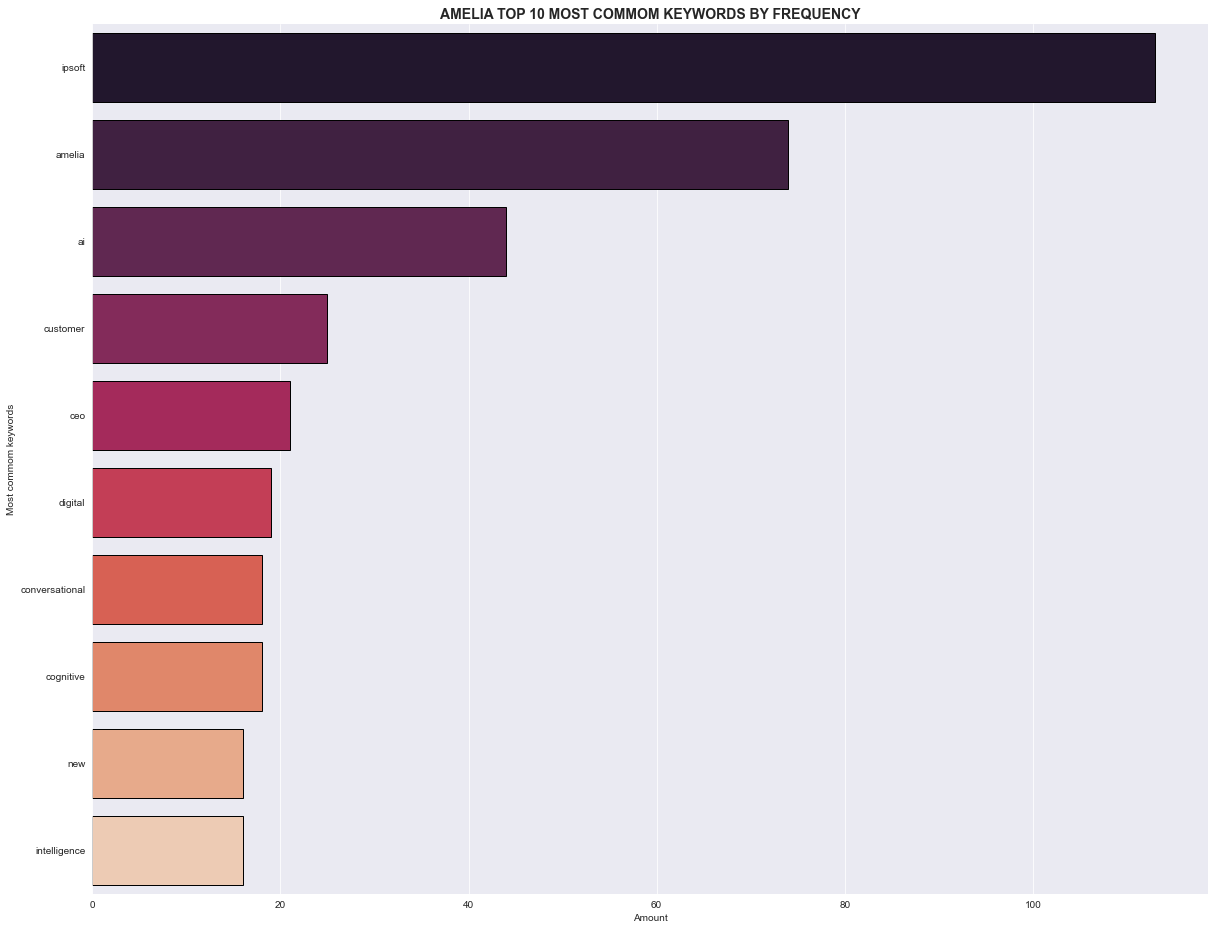

In [6]:
df = pd.DataFrame(words, columns =['Most commom keywords', 'Amount'])
rcParams['figure.figsize'] = 20,16
sns.set_style('darkgrid')
ax = sns.barplot(x='Amount', y='Most commom keywords', data= df[:10], palette='rocket', edgecolor='k')
ax.set_title('AMELIA TOP 10 MOST COMMOM KEYWORDS BY FREQUENCY', fontsize=14, weight='bold')
ax.set_xlabel('Amount')
sns.despine();
plt.savefig('amelia_keywords.png')

In [7]:
doc = list(nlp(message_text).noun_chunks)

In [13]:
import sys

orig_stdout = sys.stdout
f = open(
    'ipsoft.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'IPsoft' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [15]:
df = pd.read_table(
    'ipsoft.txt', 
    header=None,
    encoding= 'cp1252'
)
df.rename(
    columns={
        0: 'IPsoft'
    },
    inplace=True, 
    errors='raise'
)
dff = pd.DataFrame(
    data=df.IPsoft.value_counts()
).rename(
    columns={'IPsoft': 'Frequency'}
).rename_axis(
    'Term'
)
dff.head()

,Frequency
Term,
IPsoft,30
IPsoft CEO,5
IPsoft’s Amelia,5
IPsoft CEO Chetan Dube,4
IPsoft Partners,1


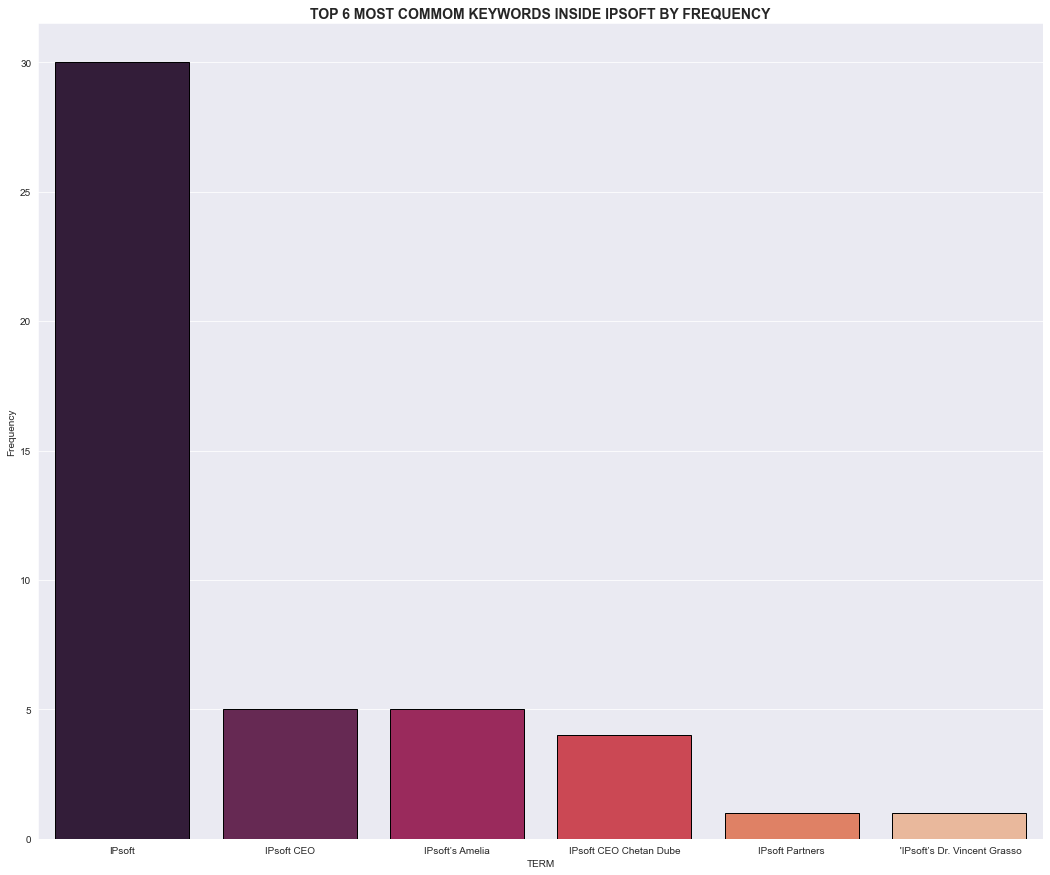

In [17]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff[:6], 
    x=dff.index[:6], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP 6 MOST COMMOM KEYWORDS INSIDE IPSOFT BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'most_commom_keyword.png'
)

In [18]:
orig_stdout = sys.stdout
f = open(
    'amelia.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'Amelia' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [20]:
df2 = pd.read_table(
    'amelia.txt', 
    header=None,
    encoding= 'cp1252'
)
df2.rename(
    columns={
        0: 'Amelia'
    },
    inplace=True, 
    errors='raise'
)
dff2 = pd.DataFrame(
    data=df2.Amelia.value_counts()
).rename(
    columns={'Amelia': 'Frequency'}
).rename_axis(
    'Term'
)
dff2.head()

,Frequency
Term,
Amelia,30
IPsoft’s Amelia,5
Amelia',4
'Amelia,2
Conversational AI',2


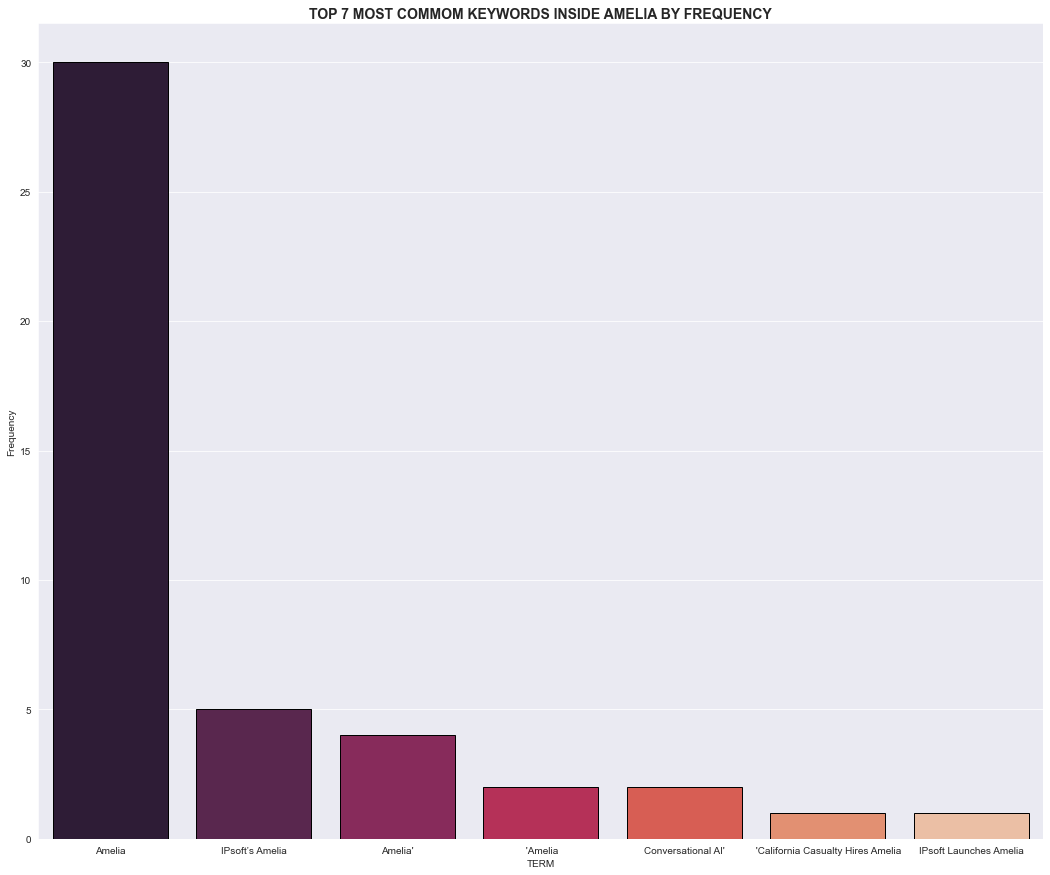

In [21]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff2[:7], 
    x=dff2.index[:7], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP 7 MOST COMMOM KEYWORDS INSIDE AMELIA BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'second_most_commom_keyword.png'
)

In [22]:
orig_stdout = sys.stdout
f = open(
    'ai.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'AI' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [24]:
df3 = pd.read_table(
    'ai.txt', 
    header=None,
    encoding= 'cp1252'
)
df3.rename(
    columns={
        0: 'AI'
    },
    inplace=True, 
    errors='raise'
)
dff3 = pd.DataFrame(
    data=df3.AI.value_counts()
).rename(
    columns={'AI': 'Frequency'}
).rename_axis(
    'Term'
)
dff3.head()

,Frequency
Term,
AI,13
Conversational AI,4
Conversational AI',3
Free AI-Powered Digital Employee,1
AI’s Future,1


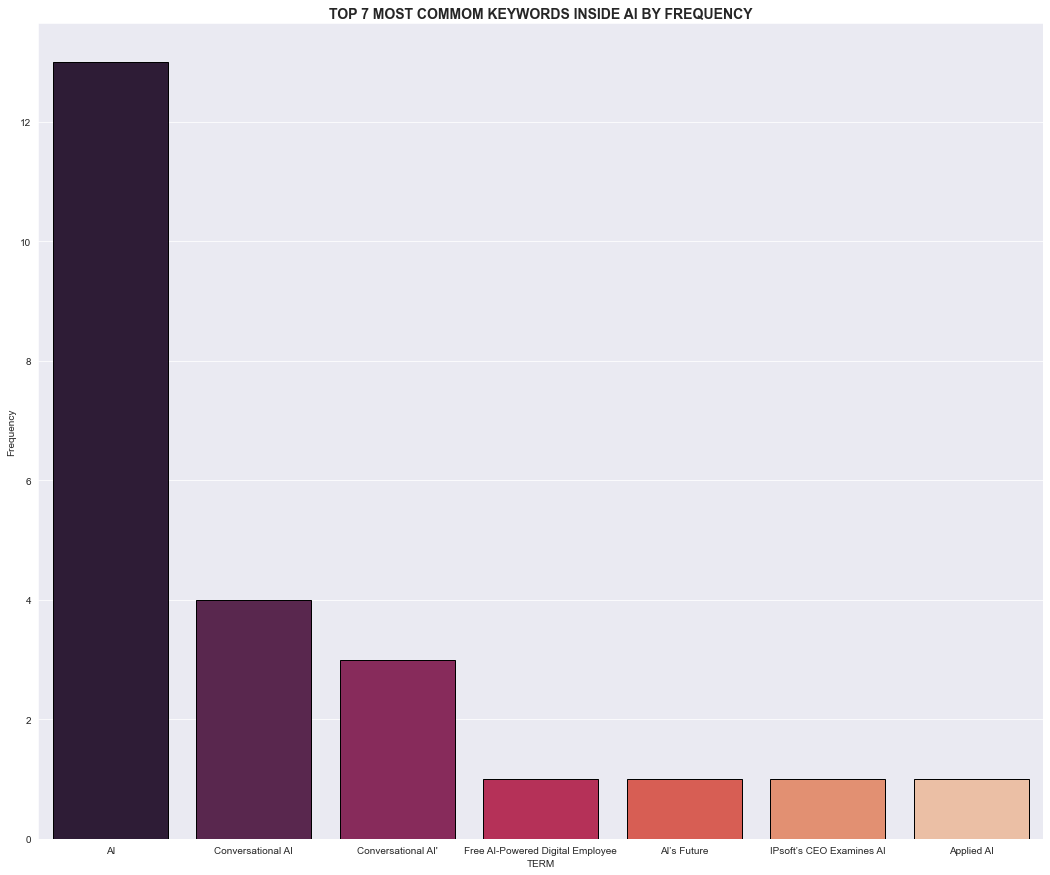

In [25]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff3[:7], 
    x=dff3.index[:7], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP 7 MOST COMMOM KEYWORDS INSIDE AI BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'third_most_commom_keyword.png'
)

In [26]:
orig_stdout = sys.stdout
f = open(
    'customer.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'Customer' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [28]:
df4 = pd.read_table(
    'customer.txt', 
    header=None
)
df4.rename(
    columns={
        0: 'Customer'
    },
    inplace=True, 
    errors='raise'
)
dff4 = pd.DataFrame(
    data=df4.Customer.value_counts()
).rename(
    columns={'Customer': 'Frequency'}
).rename_axis(
    'Term'
)
dff4.head()

,Frequency
Term,
Customer Service,6
Customer Experience,2
Customer Care,2
'IPsoft CEO Highlights Customer Success Stories,1
Improving Customer Service,1


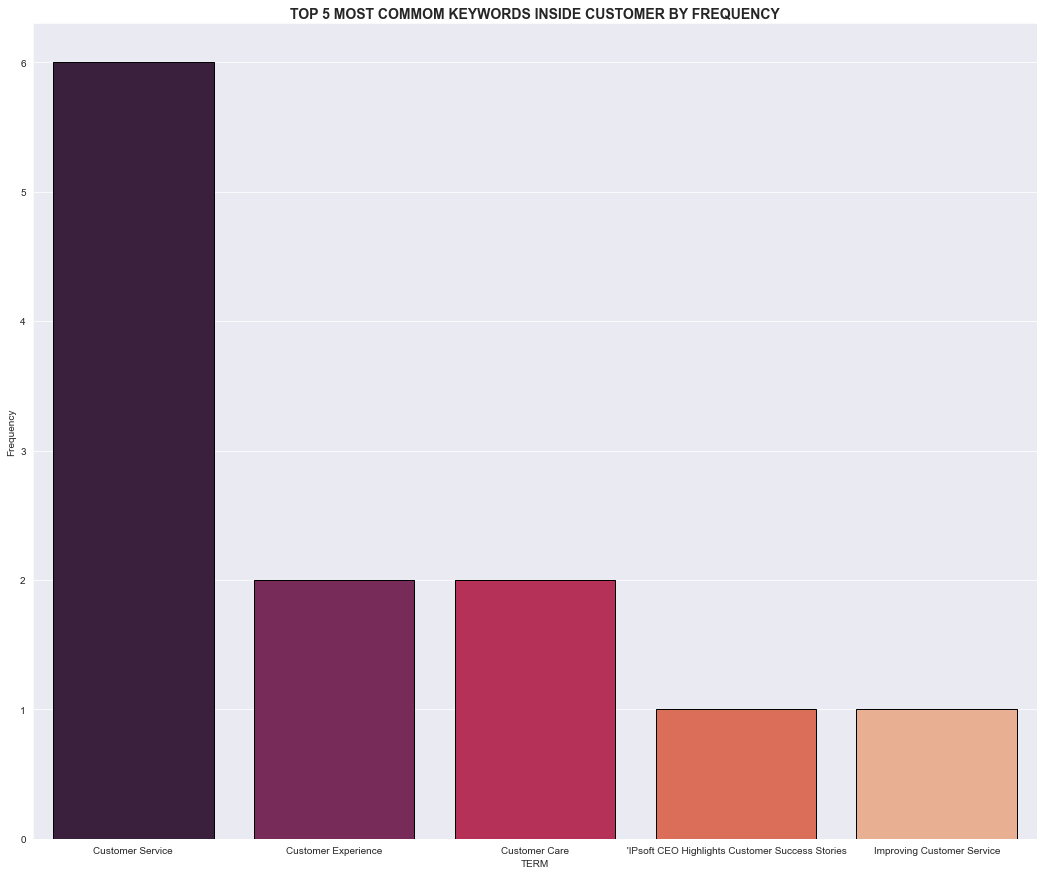

In [31]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff4[:5], 
    x=dff4.index[:5], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP 5 MOST COMMOM KEYWORDS INSIDE CUSTOMER BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'fourth_most_commom_keyword.png'
)

In [32]:
orig_stdout = sys.stdout
f = open(
    'ceo.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'CEO' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [33]:
df5 = pd.read_table(
    'ceo.txt', 
    header=None,
    encoding= 'cp1252'
)
df5.rename(
    columns={
        0: 'CEO'
    },
    inplace=True, 
    errors='raise'
)
dff5 = pd.DataFrame(
    data=df5.CEO.value_counts()
).rename(
    columns={'CEO': 'Frequency'}
).rename_axis(
    'Term'
)
dff5.head()

,Frequency
Term,
IPsoft CEO,5
IPsoft CEO Chetan Dube,4
CEO,2
The CEO Forum,1
IPsoft CEO Chetan Dube',1


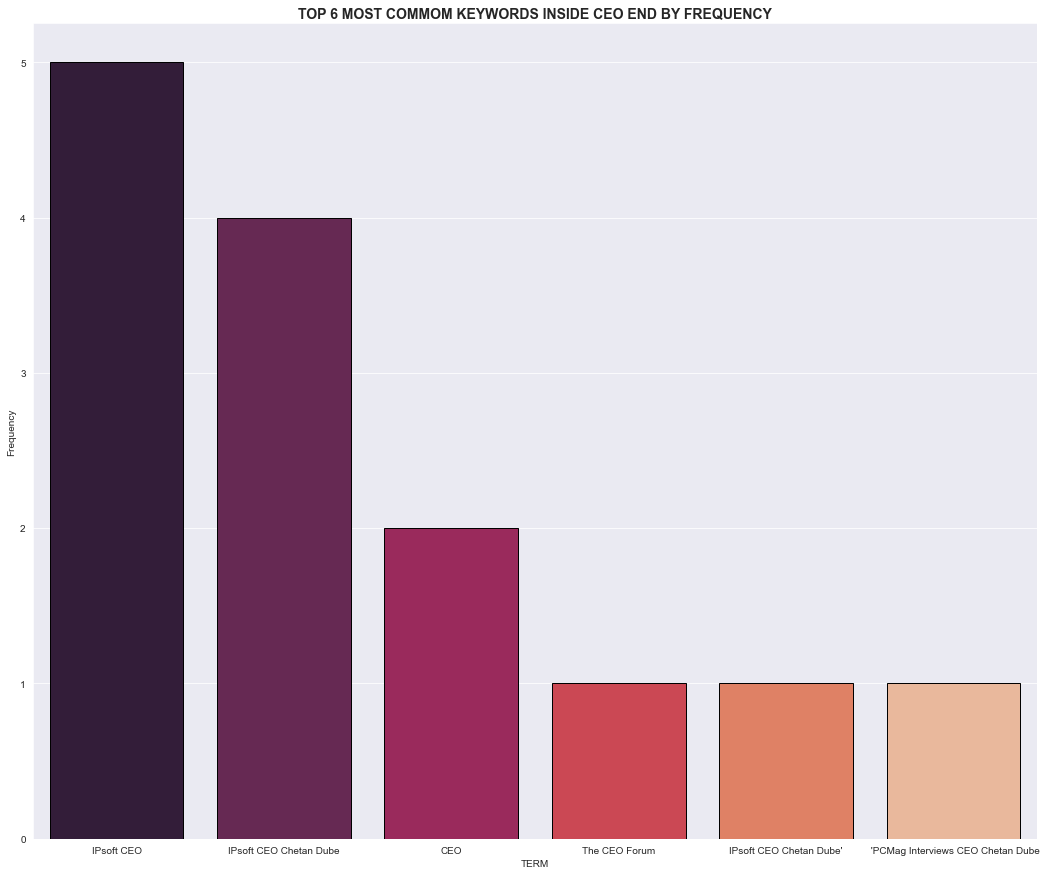

In [36]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff5[:6], 
    x=dff5.index[:6], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP 6 MOST COMMOM KEYWORDS INSIDE CEO END BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'fifth_most_commom_keyword.png'
)

In [37]:
orig_stdout = sys.stdout
f = open(
    'digital.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'Digital' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [38]:
df6 = pd.read_table(
    'digital.txt', 
    header=None,
    encoding= 'cp1252'
)
df6.rename(
    columns={
        0: 'Digital'
    },
    inplace=True, 
    errors='raise'
)
dff6 = pd.DataFrame(
    data=df6.Digital.value_counts()
).rename(
    columns={'Digital': 'Frequency'}
).rename_axis(
    'Term'
)
dff6.head()

,Frequency
Term,
DigitalWorkforce.ai,4
Digital Labor,1
Starfish Digital Hires Amelia,1
Amelia Launches Digital Employee Builder,1
the Market-Leading Digital Employee,1


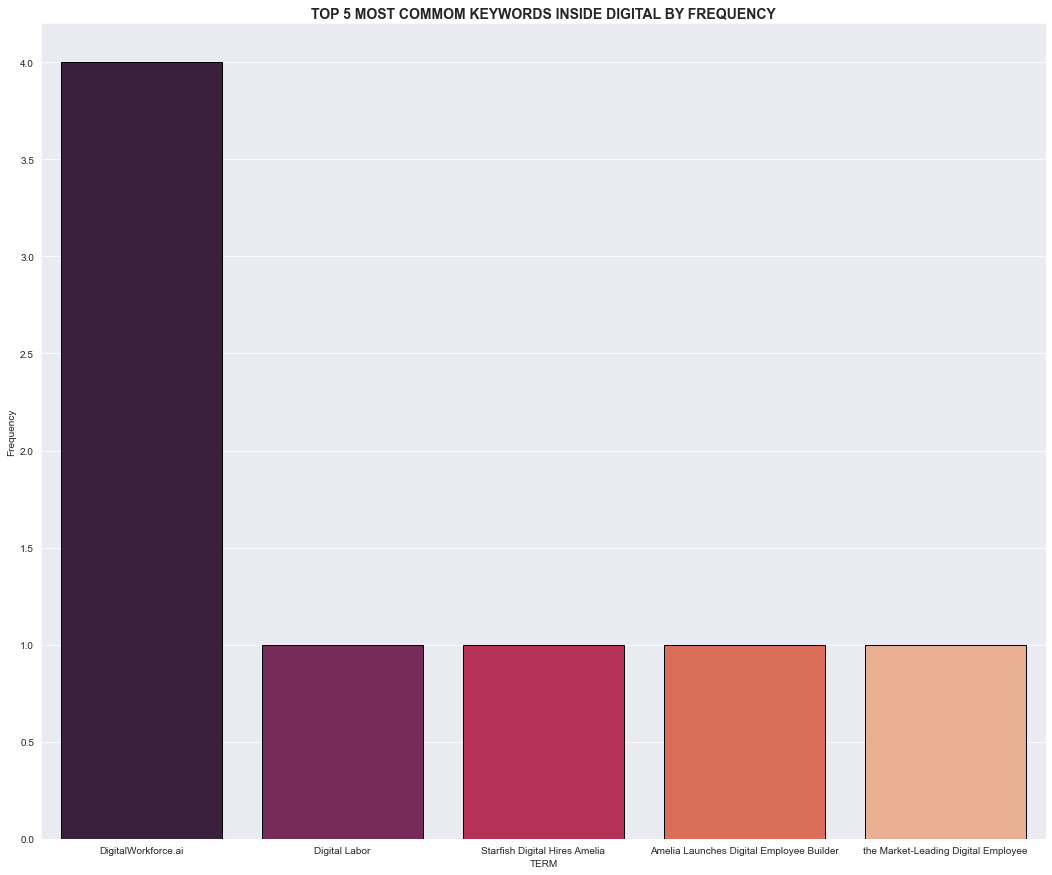

In [41]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff6[:5], 
    x=dff6.index[:5], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP 5 MOST COMMOM KEYWORDS INSIDE DIGITAL BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'sixth_most_commom_keyword.png'
)

In [42]:
orig_stdout = sys.stdout
f = open(
    'conversational.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'Conversational' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [44]:
df7 = pd.read_table(
    'conversational.txt', 
    header=None,
    encoding= 'cp1252'
)
df7.rename(
    columns={
        0: 'Conversational'
    },
    inplace=True, 
    errors='raise'
)
dff7 = pd.DataFrame(
    data=df7.Conversational.value_counts()
).rename(
    columns={'Conversational': 'Frequency'}
).rename_axis(
    'Term'
)
dff7.head()

,Frequency
Term,
Conversational AI,4
Conversational AI',3
Conversational AI Innovation,1
'NS Solutions Hires Amelia,1
'Anexinet Launches Conversational AI Kickstart,1


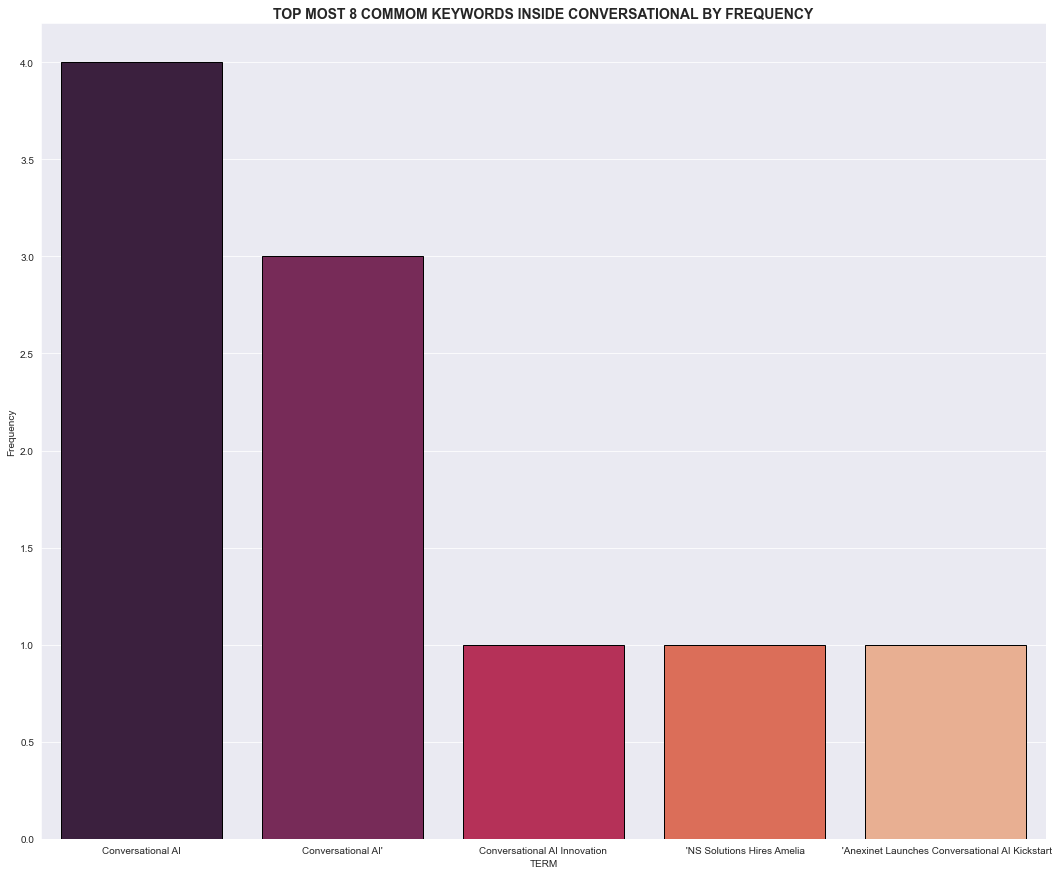

In [46]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff7[:5], 
    x=dff7.index[:5], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP MOST 8 COMMOM KEYWORDS INSIDE CONVERSATIONAL BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'seventh_most_commom_keyword.png'
)

In [47]:

orig_stdout = sys.stdout
f = open(
    'cognitive.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'Cognitive' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [49]:
df8 = pd.read_table(
    'cognitive.txt', 
    header=None,
    encoding= 'cp1252'
)
df8.rename(
    columns={
        0: 'Cognitive'
    },
    inplace=True, 
    errors='raise'
)
dff8 = pd.DataFrame(
    data=df8.Cognitive.value_counts()
).rename(
    columns={'Cognitive': 'Frequency'}
).rename_axis(
    'Term'
)
dff8.head()

,Frequency
Term,
Student Experiences',1
'IPsoft’s Cognitive Director,1
'IPsoft’s Martin Linstrom Featured,1
Cognitive Artificial Intelligence',1
IPsoft’s Cognitive Director,1


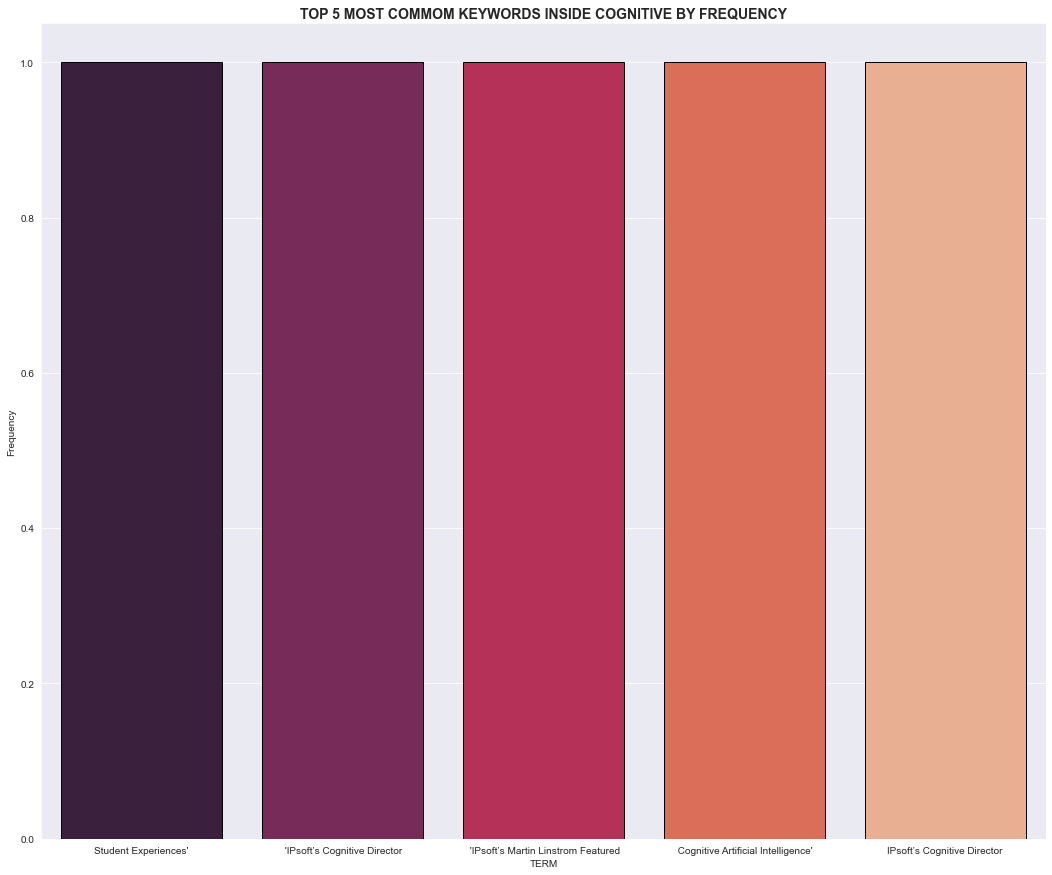

In [51]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff8[:5], 
    x=dff8.index[:5], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP 5 MOST COMMOM KEYWORDS INSIDE COGNITIVE BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'eighth_most_commom_keyword.png'
)

In [52]:
orig_stdout = sys.stdout
f = open(
    'new.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'New' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [53]:
df9 = pd.read_table(
    'new.txt', 
    header=None
)
df9.rename(
    columns={
        0: 'New'
    },
    inplace=True, 
    errors='raise'
)
dff9 = pd.DataFrame(
    data=df9.New.value_counts()
).rename(
    columns={'New': 'Frequency'}
).rename_axis(
    'Term'
)
dff9.head()

,Frequency
Term,
Amelia',1
'Wysdom and Amelia Pioneer New Conversational AI Delivery Model,1
BBC News,1
New McKinsey Article,1
a New Paradigm,1


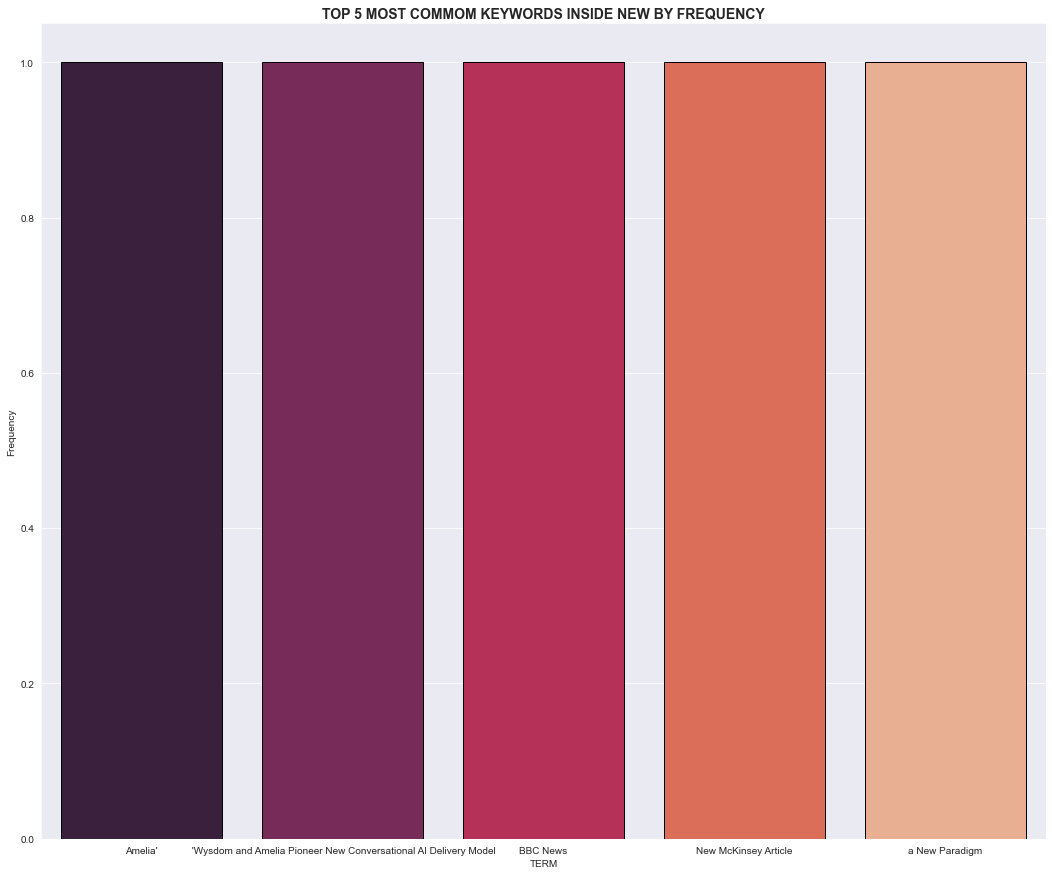

In [54]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff9[:5], 
    x=dff9.index[:5], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP 5 MOST COMMOM KEYWORDS INSIDE NEW BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'nineth_most_commom_keyword.png'
)

In [55]:
orig_stdout = sys.stdout
f = open(
    'intelligence.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'Intelligence' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [56]:
df10 = pd.read_table(
    'intelligence.txt', 
    header=None,
    encoding= 'cp1252'
)
df10.rename(
    columns={
        0: 'Intelligence'
    },
    inplace=True, 
    errors='raise'
)
dff10 = pd.DataFrame(
    data=df10.Intelligence.value_counts()
).rename(
    columns={'Intelligence': 'Frequency'}
).rename_axis(
    'Term'
)
dff10.head()

,Frequency
Term,
Artificial Intelligence,4
Teiss',1
'IPsoft Hosts Artificial Intelligence Influencers,1
Unveil Most Human Artificial Intelligence,1
IPsoft First Artificial Intelligence Provider,1


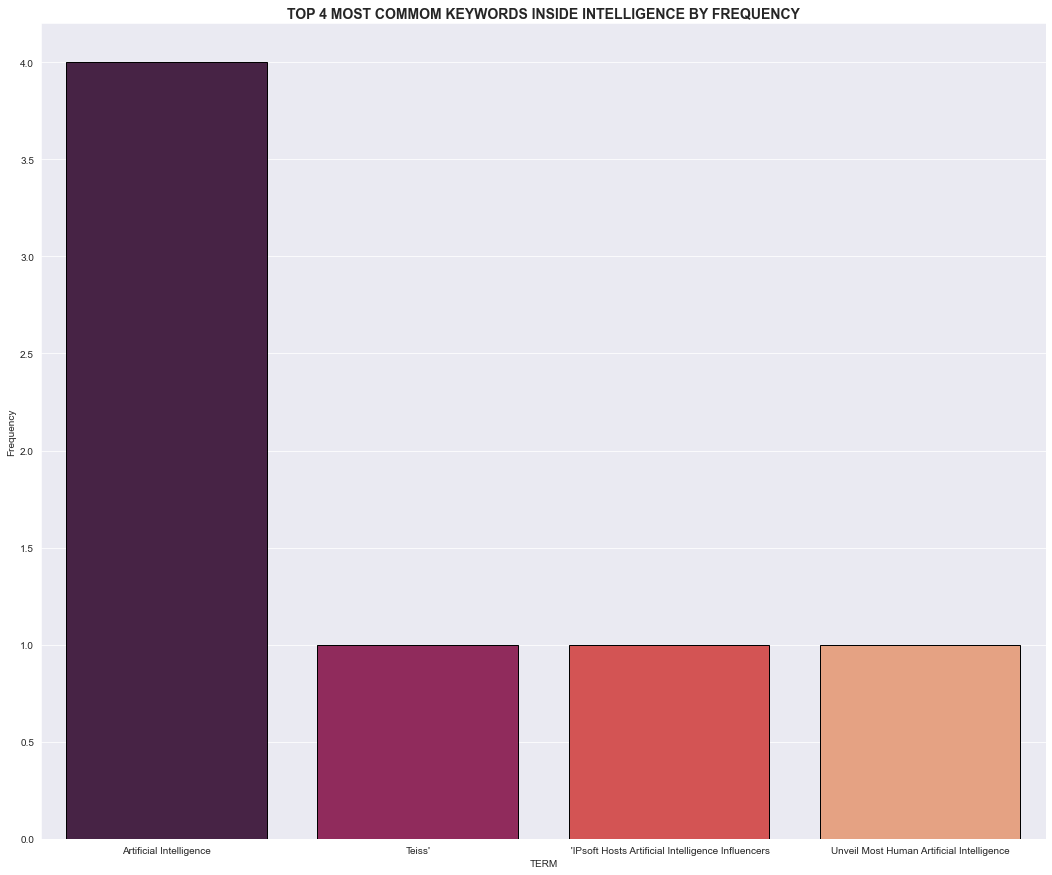

In [57]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff10[:4], 
    x=dff10.index[:4], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP 4 MOST COMMOM KEYWORDS INSIDE INTELLIGENCE BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'tenth_most_commom_keyword.png'
)